In [1]:
# OS setup
!sudo apt-get install bc tree
!cat /etc/os-release

# espnet setup
!git clone https://github.com/espnet/espnet
!cd espnet; pip install -e .
!mkdir espnet/tools/venv/bin; touch espnet/tools/venv/bin/activate

# warp ctc setup
!git clone https://github.com/espnet/warp-ctc -b pytorch-1.1
!cd warp-ctc && mkdir build && cd build && cmake .. && make -j4
!cd warp-ctc/pytorch_binding && python setup.py install

# kaldi setup
!cd ./espnet/tools; git clone https://github.com/kaldi-asr/kaldi
!echo "" > ./espnet/tools/kaldi/tools/extras/check_dependencies.sh # ignore check
!chmod +x ./espnet/tools/kaldi/tools/extras/check_dependencies.sh
!cd ./espnet/tools/kaldi/tools; make sph2pipe sclite
!rm -rf espnet/tools/kaldi/tools/python

# Non-working featbin library 
# ![ ! -e ubuntu16-featbin.tar.gz ] && wget https://18-198329952-gh.circle-artifacts.com/0/home/circleci/repo/ubuntu16-featbin.tar.gz
# !tar -xf ./ubuntu16-featbin.tar.gz
# !cp featbin/* espnet/tools/kaldi/src/featbin/

# Working one
![ ! -e ubuntu16-featbin.tar.gz ] && wget --tries=3 https://github.com/espnet/kaldi-bin/releases/download/v0.0.1/ubuntu16-featbin.tar.gz
!tar -xf ./ubuntu16-featbin.tar.gz
!cp featbin/* espnet/tools/kaldi/src/featbin/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  bc tree
0 upgraded, 2 newly installed, 0 to remove and 17 not upgraded.
Need to get 136 kB of archives.
After this operation, 336 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 bc amd64 1.07.1-3build1 [87.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 136 kB in 0s (444 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously un

In [5]:
!apt-get install -qq g++ automake autoconf libtool subversion sox

Selecting previously unselected package libapr1:amd64.
(Reading database ... 120926 files and directories currently installed.)
Preparing to unpack .../00-libapr1_1.7.0-8ubuntu0.22.04.1_amd64.deb ...
Unpacking libapr1:amd64 (1.7.0-8ubuntu0.22.04.1) ...
Selecting previously unselected package libaprutil1:amd64.
Preparing to unpack .../01-libaprutil1_1.6.1-5ubuntu4.22.04.2_amd64.deb ...
Unpacking libaprutil1:amd64 (1.6.1-5ubuntu4.22.04.2) ...
Selecting previously unselected package libopencore-amrnb0:amd64.
Preparing to unpack .../02-libopencore-amrnb0_0.1.5-1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.5-1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../03-libopencore-amrwb0_0.1.5-1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.5-1) ...
Selecting previously unselected package libserf-1-1:amd64.
Preparing to unpack .../04-libserf-1-1_1.3.9-10ubuntu2_amd64.deb ...
Unpacking libserf-1-1:amd64 (1.3.9-10ubuntu2) ...
Selecting p

In [ ]:
# build kaldi inside the espnet (Optional)

# !cd espnet/tools/kaldi/tools; make -j4
# !cd espnet/tools/kaldi/src; ./configure --shared; make depend -j 8; make -j 8

In [10]:
!cd espnet; ./tools/installers/install_sph2pipe.sh
!export PATH=$PATH:~/espnet/sph2pipe

In [14]:
import os
current_path, desired_path = os.environ.get('PATH', ''), '/content/espnet/sph2pipe' 
os.environ['PATH'] = f'{current_path}:{desired_path}'

In [15]:
# in order to take the data of an4
!cd espnet/egs/an4/asr1; ./run.sh  --ngpu 1 --stop-stage 2

./path.sh: line 10: /content/espnet/egs/an4/asr1/../../../tools/activate_python.sh: No such file or directory
stage -1: Data Download
local/download_and_untar.sh: an4 directory already exists in ./downloads
stage 0: Data preparation
stage 1: Feature Generation
steps/make_fbank_pitch.sh --cmd run.pl --nj 8 --write_utt2num_frames true data/test exp/make_fbank/test fbank
./path.sh: line 10: /content/espnet/egs/an4/asr1/../../../tools/activate_python.sh: No such file or directory
utils/validate_data_dir.sh: Successfully validated data-directory data/test
steps/make_fbank_pitch.sh: [info]: no segments file exists: assuming wav.scp indexed by utterance.
steps/make_fbank_pitch.sh: Succeeded creating filterbank and pitch features for test
fix_data_dir.sh: kept all 130 utterances.
fix_data_dir.sh: old files are kept in data/test/.backup
steps/make_fbank_pitch.sh --cmd run.pl --nj 8 --write_utt2num_frames true data/train exp/make_fbank/train fbank
./path.sh: line 10: /content/espnet/egs/an4/asr1

In [17]:
!ls espnet/egs/an4/asr1/data/train

.
├── espnet
├── featbin
├── sample_data
├── ubuntu16-featbin.tar.gz
└── warp-ctc

4 directories, 1 file
/content
conf	   frame_shift	text	 utt2num_frames  wav.scp
feats.scp  spk2utt	utt2dur  utt2spk


# Load Data

('fkai-an311-b',
 {'input': [{'feat': '/content/espnet/egs/an4/asr1/dump/train_nodev/deltafalse/feats.1.ark:13',
    'name': 'input1',
    'shape': [308, 83]}],
  'output': [{'name': 'target1',
    'shape': [26, 30],
    'text': 'ERASE I S L F THIRTY EIGHT',
    'token': 'E R A S E <space> I <space> S <space> L <space> F <space> T H I R T Y <space> E I G H T',
    'tokenid': '7 20 3 21 7 2 11 2 21 2 14 2 8 2 22 10 11 20 22 27 2 7 11 9 10 22'}],
  'utt2spk': 'fkai'})

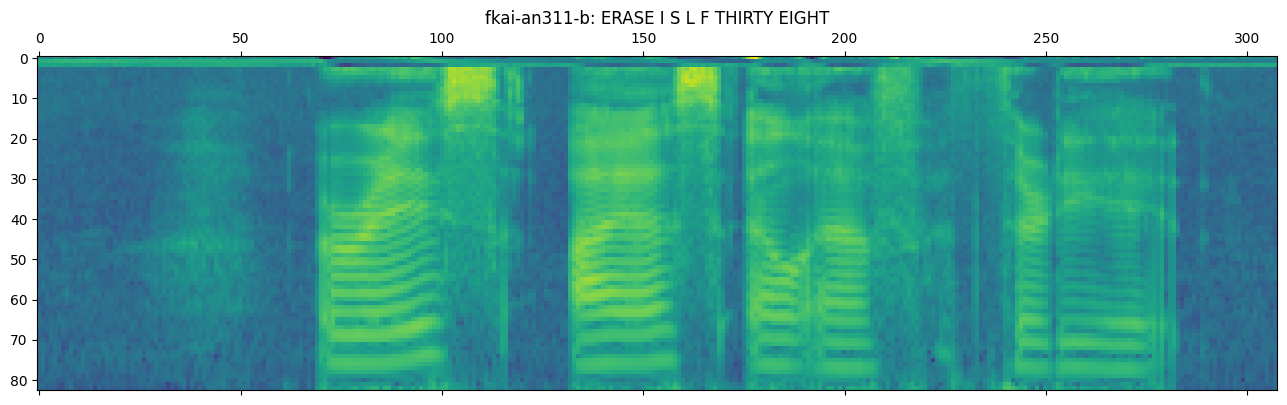

In [18]:
import json
import matplotlib.pyplot as plt
import kaldiio

root = "espnet/egs/an4/asr1"
with open(root + "/dump/train_nodev/deltafalse/data.json", "r") as f:
  train_json = json.load(f)["utts"]
with open(root + "/dump/train_dev/deltafalse/data.json", "r") as f:
  dev_json = json.load(f)["utts"]

key, info = next(iter(train_json.items()))

# plot the 80-dim fbank + 3-dim pitch speech feature
fbank = kaldiio.load_mat(info["input"][0]["feat"])
plt.matshow(fbank.T[::-1])
plt.title(key + ": " + info["output"][0]["text"])

# print the key-value pair
key, info

# Prepare Data

In [20]:
from espnet.espnet.utils.training.batchfy import make_batchset

batch_size = 32
trainset = make_batchset(train_json, batch_size)
devset = make_batchset(dev_json, batch_size)
assert len(devset[0]) == batch_size
devset[0][:3]

[('fbbh-an89-b',
  {'input': [{'feat': '/content/espnet/egs/an4/asr1/dump/train_dev/deltafalse/feats.1.ark:257878',
     'name': 'input1',
     'shape': [638, 83]}],
   'output': [{'name': 'target1',
     'shape': [40, 30],
     'text': 'RUBOUT T G J W B SEVENTY NINE FIFTY NINE',
     'token': 'R U B O U T <space> T <space> G <space> J <space> W <space> B <space> S E V E N T Y <space> N I N E <space> F I F T Y <space> N I N E',
     'tokenid': '20 23 4 17 23 22 2 22 2 9 2 12 2 25 2 4 2 21 7 24 7 16 22 27 2 16 11 16 7 2 8 11 8 22 27 2 16 11 16 7'}],
   'utt2spk': 'fbbh'}),
 ('fejs-cen4-b',
  {'input': [{'feat': '/content/espnet/egs/an4/asr1/dump/train_dev/deltafalse/feats.4.ark:106716',
     'name': 'input1',
     'shape': [528, 83]}],
   'output': [{'name': 'target1',
     'shape': [23, 30],
     'text': 'F I N D L E Y D R I V E',
     'token': 'F <space> I <space> N <space> D <space> L <space> E <space> Y <space> D <space> R <space> I <space> V <space> E',
     'tokenid': '8 2 11 2 16

In [23]:
!pip install chainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chainer: filename=chainer-7.8.1-py3-none-any.whl size=967716 sha256=cff27d667153a14554cab2177bd704e6e7054acddf7e72ee7c207d812c049e81
  Stored in directory: /root/.cache/pip/wheels/c4/95/6a/16014db6f761c4e742755b64aac60dbe142da1df6c5919f790
Successfully built chainer


# Model

In [60]:
import argparse
import os

from espnet.espnet.bin.asr_train import get_parser
from espnet.espnet.nets.pytorch_backend.e2e_asr import E2E

parser = get_parser()
parser = E2E.add_arguments(parser)
config = parser.parse_args([
    "--mtlalpha", "0.0",  # weight for cross entropy and CTC loss
    "--outdir", "out", "--dict", ""])  # TODO: allow no arg

idim = info["input"][0]["shape"][1]
odim = info["output"][0]["shape"][1]
setattr(config, "char_list", [])
model = E2E(idim, odim, config)
model

E2E(
  (enc): Encoder(
    (enc): ModuleList(
      (0): RNNP(
        (birnn0): LSTM(83, 300, batch_first=True, bidirectional=True)
        (bt0): Linear(in_features=600, out_features=320, bias=True)
        (birnn1): LSTM(320, 300, batch_first=True, bidirectional=True)
        (bt1): Linear(in_features=600, out_features=320, bias=True)
        (birnn2): LSTM(320, 300, batch_first=True, bidirectional=True)
        (bt2): Linear(in_features=600, out_features=320, bias=True)
        (birnn3): LSTM(320, 300, batch_first=True, bidirectional=True)
        (bt3): Linear(in_features=600, out_features=320, bias=True)
      )
    )
  )
  (ctc): CTC(
    (ctc_lo): Linear(in_features=320, out_features=30, bias=True)
    (dropout): Dropout(p=0.0, inplace=False)
    (ctc_loss): CTCLoss()
  )
  (att): ModuleList(
    (0): AttDot(
      (mlp_enc): Linear(in_features=320, out_features=320, bias=True)
      (mlp_dec): Linear(in_features=320, out_features=320, bias=True)
    )
  )
  (dec): Decoder(
   

In [61]:
import numpy
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.nn.utils.clip_grad import clip_grad_norm_
from torch.utils.data import DataLoader

def collate(minibatch):
  fbanks = []
  tokens = []
  for key, info in minibatch[0]:
    fbanks.append(torch.tensor(kaldiio.load_mat(info["input"][0]["feat"])))
    tokens.append(torch.tensor([int(s) for s in info["output"][0]["tokenid"].split()]))
  ilens = torch.tensor([x.shape[0] for x in fbanks])
  return pad_sequence(fbanks, batch_first=True), ilens, pad_sequence(tokens, batch_first=True)

train_loader = DataLoader(trainset, collate_fn=collate, shuffle=True, pin_memory=True)
dev_loader = DataLoader(devset, collate_fn=collate, pin_memory=True)
model.cuda()
optim = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.98))

n_iter = len(trainset)
n_epoch = 10
total_iter = n_iter * n_epoch
train_acc = []
valid_acc = []
for epoch in range(n_epoch):
  # training
  acc = []
  model.train()
  for data in train_loader:
    loss = model(*[d.cuda() for d in data])
    optim.zero_grad()
    loss.backward()
    acc.append(model.acc)
    norm = clip_grad_norm_(model.parameters(), 10.0)
    optim.step()
  train_acc.append(numpy.mean(acc))

  # validation
  acc = []
  model.eval()
  for data in dev_loader:
    model(*[d.cuda() for d in data])
    acc.append(model.acc)
  valid_acc.append(numpy.mean(acc))
  print(f"epoch: {epoch}, train acc: {train_acc[-1]:.3f}, dev acc: {valid_acc[-1]:.3f}")


Using make_pad_mask with a list of lengths is not tracable. If you try to trace this function with type(lengths) == list, please change the type of lengths to torch.LongTensor.
Using make_pad_mask with a list of lengths is not tracable. If you try to trace this function with type(lengths) == list, please change the type of lengths to torch.LongTensor.
Using make_pad_mask with a list of lengths is not tracable. If you try to trace this function with type(lengths) == list, please change the type of lengths to torch.LongTensor.
Using make_pad_mask with a list of lengths is not tracable. If you try to trace this function with type(lengths) == list, please change the type of lengths to torch.LongTensor.
Using make_pad_mask with a list of lengths is not tracable. If you try to trace this function with type(lengths) == list, please change the type of lengths to torch.LongTensor.
Using make_pad_mask with a list of lengths is not tracable. If you try to trace this function with type(lengths) ==

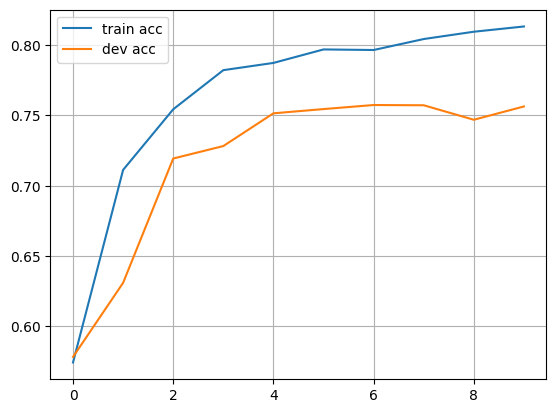

In [62]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_acc)), train_acc, label="train acc")
plt.plot(range(len(valid_acc)), valid_acc, label="dev acc")
plt.grid()
plt.legend()

In [69]:
!pwd

/


# Testing

groundtruth: ONE FIVE TWO THREE SIX
Using make_pad_mask with a list of lengths is not tracable. If you try to trace this function with type(lengths) == list, please change the type of lengths to torch.LongTensor.
prediction:  ENTER SIXTY SIX


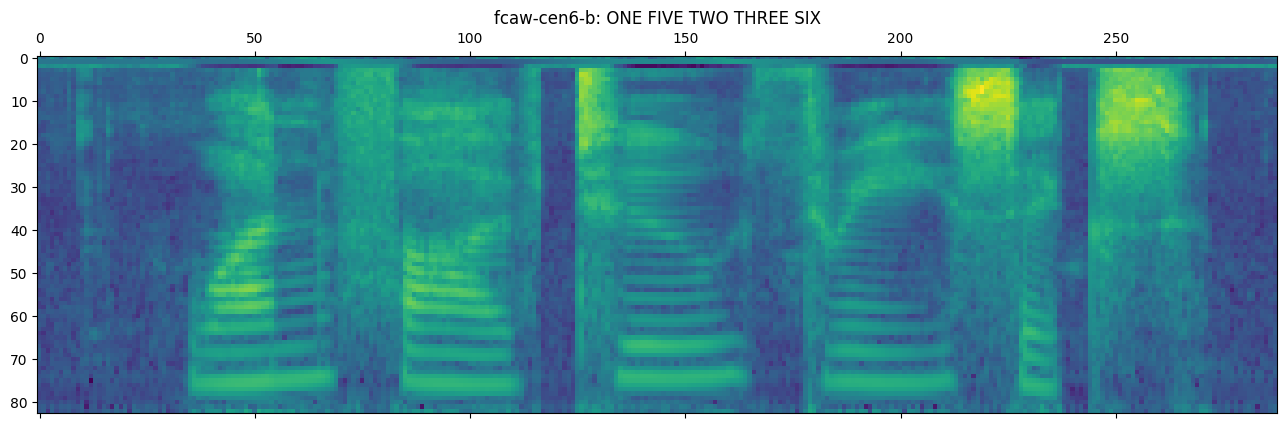

In [70]:
import json
import matplotlib.pyplot as plt
import kaldiio
from espnet.espnet.bin.asr_recog import get_parser

# load data
root = "content/espnet/egs/an4/asr1"
with open(root + "/dump/test/deltafalse/data.json", "r") as f:
  test_json = json.load(f)["utts"]

key, info = list(test_json.items())[10]

# plot the 80-dim fbank + 3-dim pitch speech feature
fbank = kaldiio.load_mat(info["input"][0]["feat"])
plt.matshow(fbank.T[::-1])
plt.title(key + ": " + info["output"][0]["text"])

# load token dict
with open(root + "/data/lang_1char/train_nodev_units.txt", "r") as f:
  token_list = [entry.split()[0] for entry in f]
token_list.insert(0, '<blank>')
token_list.append('<eos>')

# recognize speech
parser = get_parser()
args = parser.parse_args([
    "--beam-size", "1",
    "--ctc-weight", "0",
    "--result-label", "out.json",
    "--model", ""
])
model.cpu()
model.eval()

def to_str(result):
  return "".join(token_list[y] for y in result[0]["yseq"]) \
    .replace("<eos>", "").replace("<space>", " ").replace("<blank>", "")

print("groundtruth:", info["output"][0]["text"])
print("prediction: ", to_str(model.recognize(fbank, args, token_list)))